# Churn Bank Costumer Prediction

Dataset utilizado: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn

Churn é um termo que se descreve a taxa de rotatividade(cancelamento) de clientes em determinado produto ou serviço, isso é importante para empresas já que é de interesse saberem quantos clientes estão deixando para futuramente assegurar cada vez mais clientes, sendo parte do trabalho do cientista de dados explicar o porque disso estar acontecendo, unica forma através dos dados

Nessa base de dados tem dados sobre os consumidores e seus dados a coluna "Exited" representa clientes que cancelaram(1) e ativos(0). Os consumidores são europeus representados por 3 paises.

Detalhes sobre cada coluna:
- RowNumber — corresponde ao número do registro (linha) e não tem efeito na saída.

- CustomerId – contém valores aleatórios e não afeta a saída do cliente do banco.

- Surname(Sobrenome) – o sobrenome de um cliente não tem impacto na decisão de deixar o banco.

- CreditScore – pode afetar a rotatividade de clientes, uma vez que um cliente com uma pontuação de crédito mais alta tem menos probabilidade de deixar o banco.

- Geography(Geografia) – a localização de um cliente pode afetar sua decisão de deixar o banco.

- Gender(Género) – é interessante explorar se o género desempenha um papel na saída de um cliente do banco.

- Age(Idade) – isto é certamente relevante, uma vez que os clientes mais velhos têm menos probabilidades de abandonar o banco do que os mais jovens.

- tenure(Posse) – refere-se ao número de anos que o cliente é cliente do banco. Normalmente, os clientes mais velhos são mais leais e menos propensos a deixar o banco.

- Balance(Saldo) – também um indicador muito bom de rotatividade de clientes, já que as pessoas com saldo mais alto em suas contas têm menos probabilidade de deixar o banco em comparação com aquelas com saldos mais baixos.

- NumOfProducts(numero de produtos) — refere-se ao número de produtos que um cliente comprou por meio do banco.

- HasCrCard(Tem cartão) – indica se um cliente possui ou não um cartão de crédito. Essa coluna também é relevante, pois quem tem cartão de crédito tem menor probabilidade de sair do banco.

- IsActiveMember(é membro ativo) – os clientes ativos têm menos probabilidade de deixar o banco.

- EstimatedSalary(Salário estimado) – tal como acontece com o equilíbrio, as pessoas com salários mais baixos têm maior probabilidade de deixar o banco em comparação com aquelas com salários mais elevados.

- Exited(Saiu) – independentemente de o cliente ter saído ou não do banco.

- Complain(Reclamar) – o cliente tem reclamação ou não.

- Satisfaction Score(Pontuação de Satisfação) – Pontuação fornecida pelo cliente para resolução de reclamação.

- Card Type(Tipo de cartão) – tipo de cartão em poder do cliente.

- Points Earned(Pontos ganhos) – os pontos ganhos pelo cliente ao usar cartão de crédito.

## Importação de bibliotecas

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

colors = sns.color_palette("Set3", n_colors=18)
colors

[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (1.0, 0.9294117647058824, 0.43529411764705883),
 (0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961)]

## 1. Visualização dos dados

In [2]:
df = pd.read_csv("../data\Customer-Churn-Records.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [6]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [7]:
df.duplicated().sum()

0

Sem dados duplicados ou nulos podemos prosseguir normalmente com a exploração sem problemas!

- Transformados os dados Object para assim conseguir compara-los na descrição numerica

In [8]:
# (Surname) Geography	Gender	Card Type
leGeography = LabelEncoder()
leGender = LabelEncoder()
leCardType = LabelEncoder()
leGeography.fit(df['Geography'])
leGender.fit(df['Gender'])
leCardType.fit(df['Card Type'])

LabelEncoder()

In [9]:
df_encoder = df.copy()

In [10]:
df_encoder['Geography'] = leGeography.transform(df['Geography'])
df_encoder['Gender'] = leGender.transform(df['Gender'])
df_encoder['Card Type'] = leCardType.transform(df['Card Type'])
df_encoder = df_encoder.drop(["Surname","RowNumber", "CustomerId"], axis=1)

In [11]:
df_encoder.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,1,2,0,464
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,1,3,0,456
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1,3,0,377
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,0,5,1,350
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,0,5,1,425


In [12]:
correlação = df_encoder.corr().sum().sort_values(ascending=True)
correlação.sort_values(ascending=False)

Complain              2.073335
Exited                2.068794
Age                   1.608660
Geography             1.157254
EstimatedSalary       1.019382
Balance               1.010155
Tenure                0.982861
Card Type             0.968601
CreditScore           0.965945
Satisfaction Score    0.951484
HasCrCard             0.949657
Point Earned          0.928077
IsActiveMember        0.798673
Gender                0.765215
NumOfProducts         0.599630
dtype: float64

## 3. Distribuição e testes de hipoteses

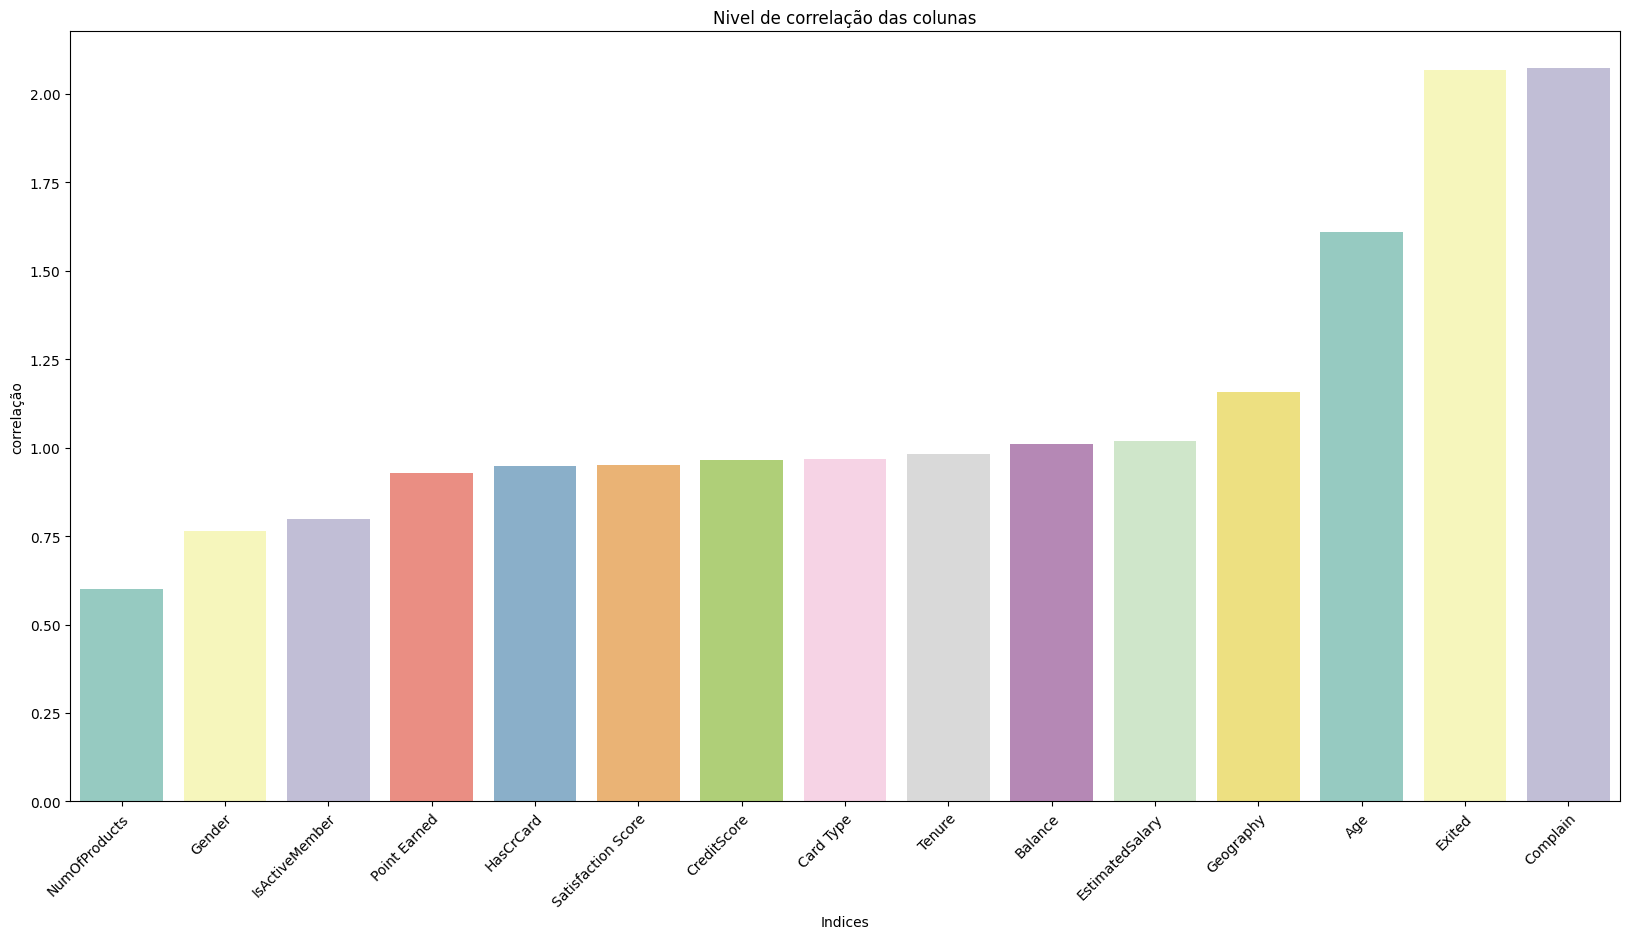

In [13]:
fig, ax = plt.subplots(figsize=(20,10))

sns.barplot(x=correlação.index, y=correlação, palette=colors[0:15])

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_ylabel("correlação")
ax.set_xlabel("Indices")
ax.set_title("Nivel de correlação das colunas")
plt.show()

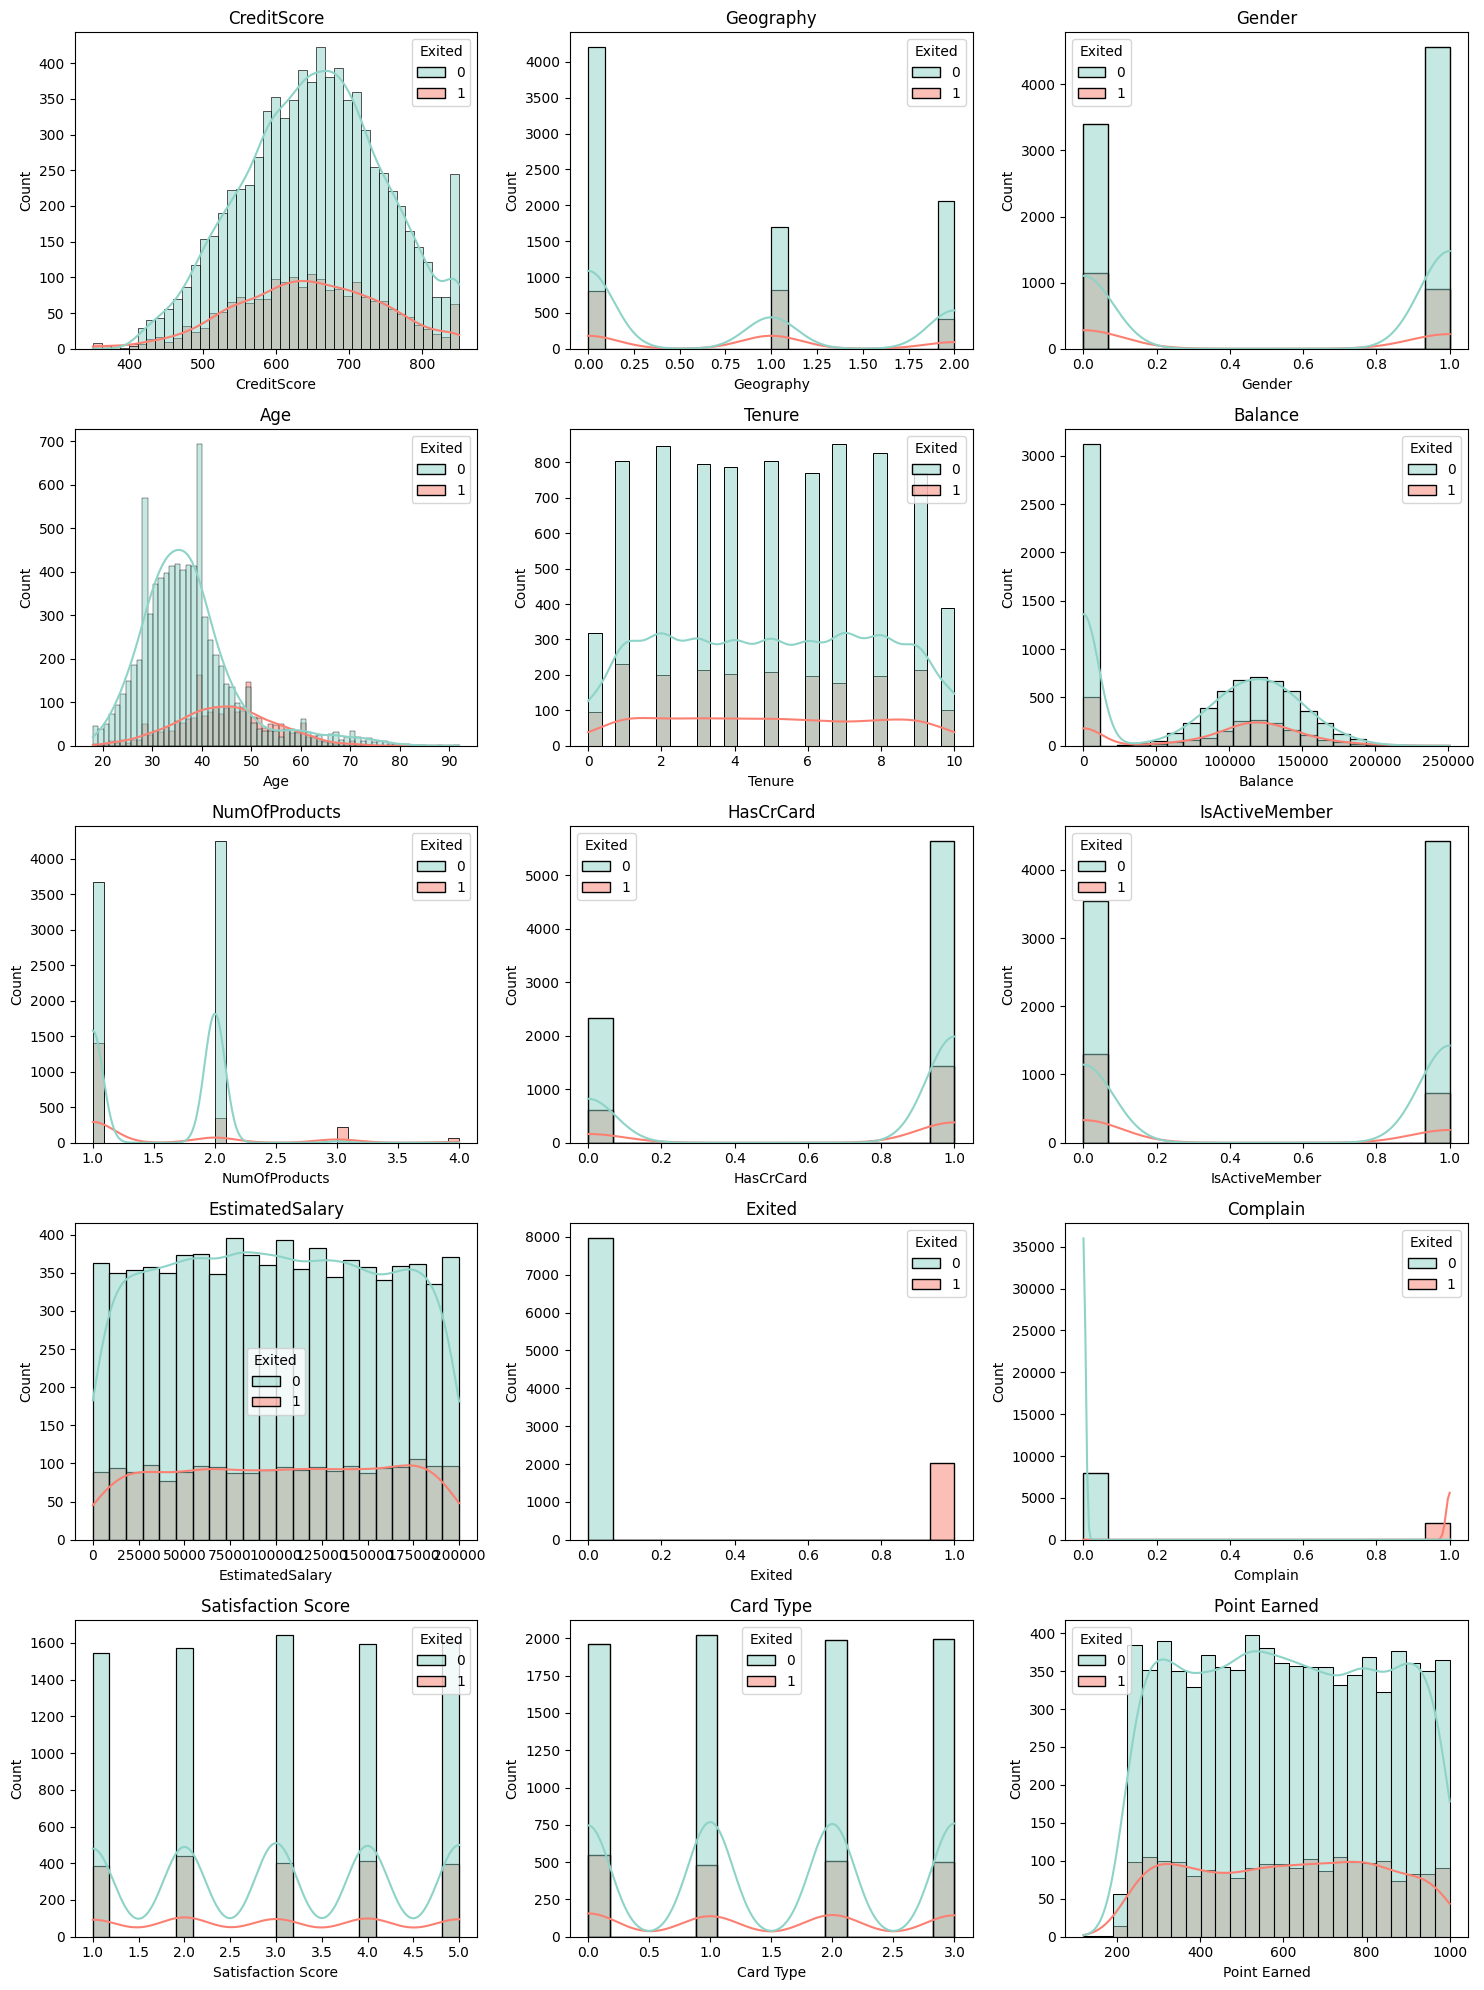

In [58]:
def plotHist():
    n_rows = 5
    n_cols = 3

    fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 20))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    for i, col in enumerate(df_encoder):
        
        sns.histplot(x=df_encoder[col], ax=axs[i // n_cols, i % n_cols], kde=True, hue=df_encoder['Exited'], palette=colors[0:5:3])

        axs[i // n_cols, i % n_cols].set_title(col)

    plt.tight_layout()
    plt.show()

plotHist()

Insights

- Alguns atributos esão desbalanceados será usado SMOTE para equilibra-los.

- A que tudo indica a uma correlação muito forte entre clientes de baixo padrão(Tipo de cartão, salario estimado e etc...).

- Dados como IDs e sobrenome foi removido já que não tem relevancia.

- Coluna como a de genêro por ter pouca correlação e questão de etica não será usada na predição somente na analise descritiva.

In [55]:
paises = df['Geography'].unique()
clientes = df['Geography'].value_counts().values

coordenadas = {
    'France': {'lat': 46.603354, 'lon': 1.888330},
    'Spain': {'lat': 40.463669, 'lon': -3.74920},
    'Germany': {'lat': 51.165691, 'lon': 10.451520}
}

fig = go.Figure()

for pais in paises:
    fig.add_trace(go.Scattergeo(
        lon = [coordenadas[pais]['lon']],
        lat = [coordenadas[pais]['lat']],
        text = [f"{pais}<br>Número de clientes: {clientes[np.where(paises == pais)][0]}"],
        mode = 'markers',
        marker=dict(size=clientes[np.where(paises == pais)][0]/100, opacity=0.5)
    ))

fig.update_layout(
    geo=dict(
        scope='europe',
        showland=True,
    )
)

fig.show()

SMOTE é uma importante técnica usada para lidar com conjuntos de dados desbalanceados em problemas de classificação. Ele gera exemplos sintéticos da classe minoritária, ajudando o modelo a aprender padrões dessa classe e melhorar suas previsões. Ela será usada aqui para tornar os dados mais salientes e trazer uma revisão mais robusta

Antes do SMOTE

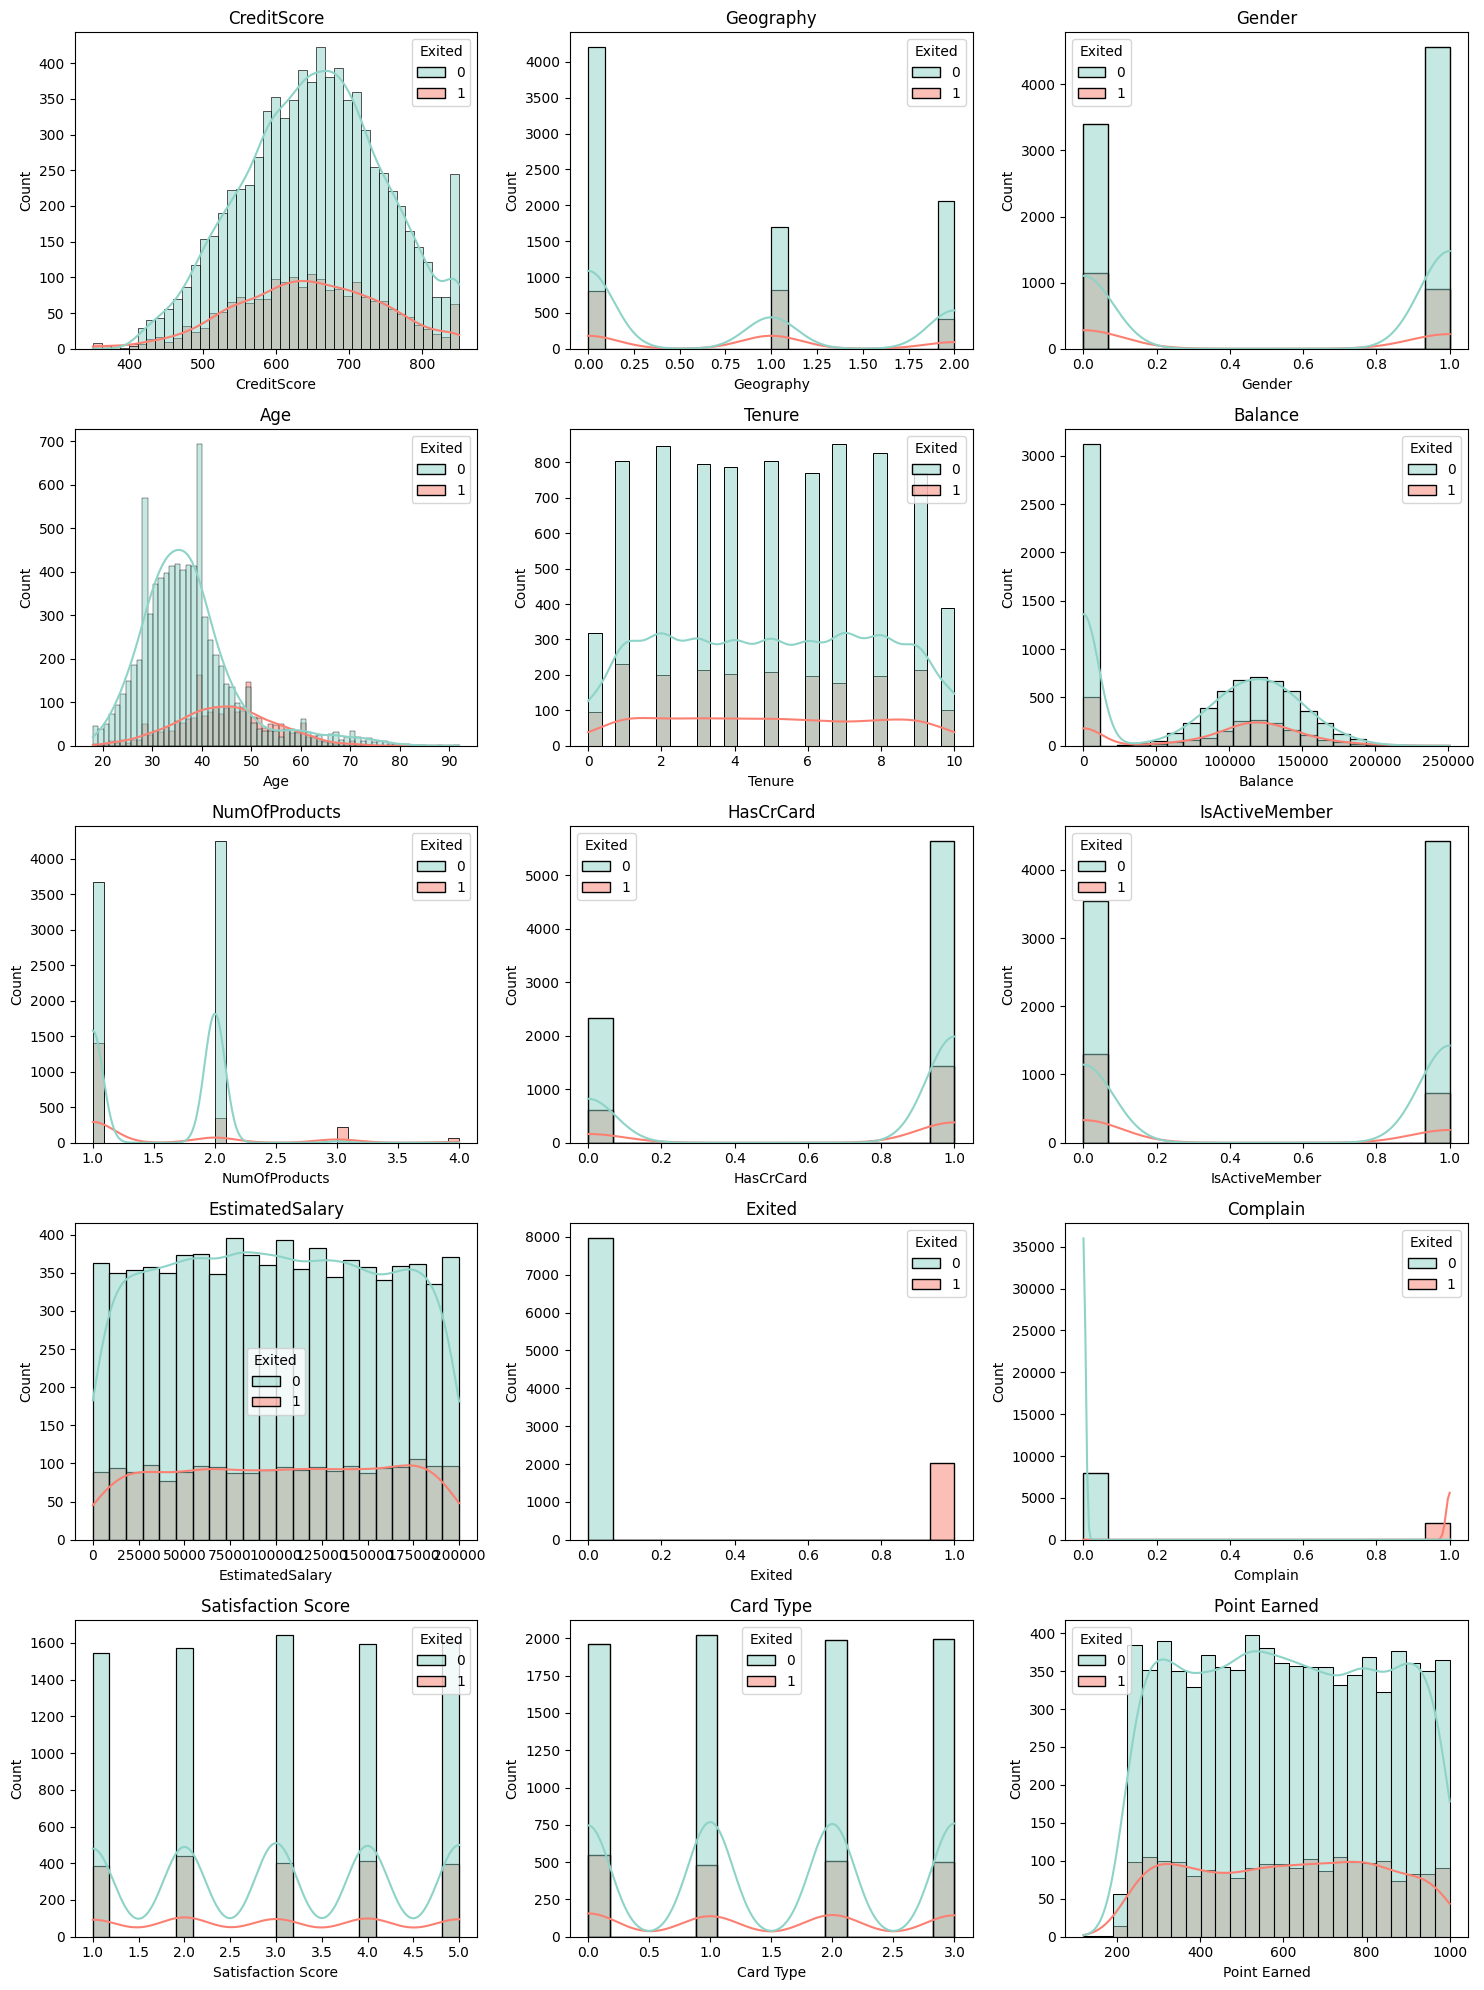

In [59]:
plotHist()